# Import Necessary Library

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img

# Download Dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

! pip install kaggle

!cp /content/drive/Shareddrives/C23-PC716/ML/kaggle.json /content/kaggle.json

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download --force -d riyaelizashaju/skin-disease-image-dataset-balanced

100% 658M/660M [00:25<00:00, 31.5MB/s]
100% 660M/660M [00:25<00:00, 27.6MB/s]


# IMG_SIZE  = 160x160

In [ ]:
import zipfile

# Extract the archive
local_zip = '/content/skin-disease-image-dataset-balanced.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_dir = pathlib.Path("/content/Split_smol/train")
validation_dir = pathlib.Path("/content/Split_smol/val")

BATCH_SIZE = 32
IMG_SIZE = TARGET_SIZE = (160, 160)

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            # validation_split=0.2,
                                                            # subset="training",
                                                            seed=123,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 1849 files belonging to 8 classes.


In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                            # validation_split=0.2,
                                                            # subset="validation",
                                                            seed=123,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 459 files belonging to 8 classes.


## Preview Dataset

In [ ]:
class_names = train_dataset.class_names

# plt.figure(figsize=(10, 10))
# for images, labels in train_dataset.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

## Identifikasi Keseimbangan Data

Total Data Training = 1849 

-------------------------------------
Nama Class  =  Actinic keratosis
Jumlah      =  224
Proporsi    =  0.12114656571119524
-------------------------------------
Nama Class  =  Basal cell carcinoma
Jumlah      =  240
Proporsi    =  0.12979989183342347
-------------------------------------
Nama Class  =  Benign keratosis
Jumlah      =  277
Proporsi    =  0.14981070849107625
-------------------------------------
Nama Class  =  Dermatofibroma
Jumlah      =  191
Proporsi    =  0.1032990805840995
-------------------------------------
Nama Class  =  Melanocytic nevus
Jumlah      =  219
Proporsi    =  0.11844240129799892
-------------------------------------
Nama Class  =  Melanoma
Jumlah      =  233
Proporsi    =  0.12601406165494863
-------------------------------------
Nama Class  =  Squamous cell carcinoma
Jumlah      =  263
Proporsi    =  0.14223904813412655
-------------------------------------
Nama Class  =  Vascular lesion
Jumlah      =  202
Proporsi    =

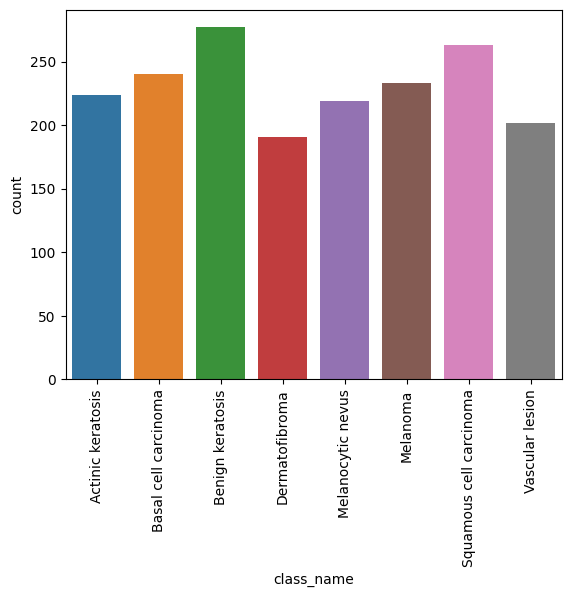

In [ ]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []
for i in range(num_classes):
  count = len(list(train_dir.glob(class_names[i]+'/*.jpg')))
  total += count
print("Total Data Training = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(train_dir.glob(class_names[i]+'/*.jpg')))
  print("Nama Class  = ",class_names[i])
  print("Jumlah      = ",count)
  print("Proporsi    = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

## Augmentor Untuk Augmentasi Data dan Menambah Sebaran Data Tiap Class

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(source_directory = os.path.join(train_dir, i), output_directory = '/content/output/'+i+'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)

Initialised with 224 image(s) found.
Output directory set to /content/output/Actinic keratosis/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7F67DD5DECE0>: 100%|██████████| 1000/1000 [02:04<00:00,  8.05 Samples/s]


Initialised with 240 image(s) found.
Output directory set to /content/output/Basal cell carcinoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F67DD6529E0>: 100%|██████████| 1000/1000 [00:39<00:00, 25.63 Samples/s]


Initialised with 277 image(s) found.
Output directory set to /content/output/Benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x682 at 0x7F67DD846E90>: 100%|██████████| 1000/1000 [01:00<00:00, 16.40 Samples/s]


Initialised with 191 image(s) found.
Output directory set to /content/output/Dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F67DD5F5330>: 100%|██████████| 1000/1000 [01:31<00:00, 10.87 Samples/s]


Initialised with 219 image(s) found.
Output directory set to /content/output/Melanocytic nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F67E0343BB0>: 100%|██████████| 1000/1000 [01:24<00:00, 11.88 Samples/s]


Initialised with 233 image(s) found.
Output directory set to /content/output/Melanoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x680 at 0x7F67DD8442B0>: 100%|██████████| 1000/1000 [01:30<00:00, 11.04 Samples/s]


Initialised with 263 image(s) found.
Output directory set to /content/output/Squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F67DD526EF0>: 100%|██████████| 1000/1000 [01:18<00:00, 12.73 Samples/s]


Initialised with 202 image(s) found.
Output directory set to /content/output/Vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F67DD5A63E0>: 100%|██████████| 1000/1000 [01:20<00:00, 12.38 Samples/s]


In [ ]:
output_dir = pathlib.Path('/content/output')
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

8000


Total Data Training Setelah Menggunakan Augmentor = 8000 

-------------------------------------
Nama Class =  Actinic keratosis
Jumlah      =  1000
Proporsi =  0.125
-------------------------------------
Nama Class =  Basal cell carcinoma
Jumlah      =  1000
Proporsi =  0.125
-------------------------------------
Nama Class =  Benign keratosis
Jumlah      =  1000
Proporsi =  0.125
-------------------------------------
Nama Class =  Dermatofibroma
Jumlah      =  1000
Proporsi =  0.125
-------------------------------------
Nama Class =  Melanocytic nevus
Jumlah      =  1000
Proporsi =  0.125
-------------------------------------
Nama Class =  Melanoma
Jumlah      =  1000
Proporsi =  0.125
-------------------------------------
Nama Class =  Squamous cell carcinoma
Jumlah      =  1000
Proporsi =  0.125
-------------------------------------
Nama Class =  Vascular lesion
Jumlah      =  1000
Proporsi =  0.125
-------------------------------------


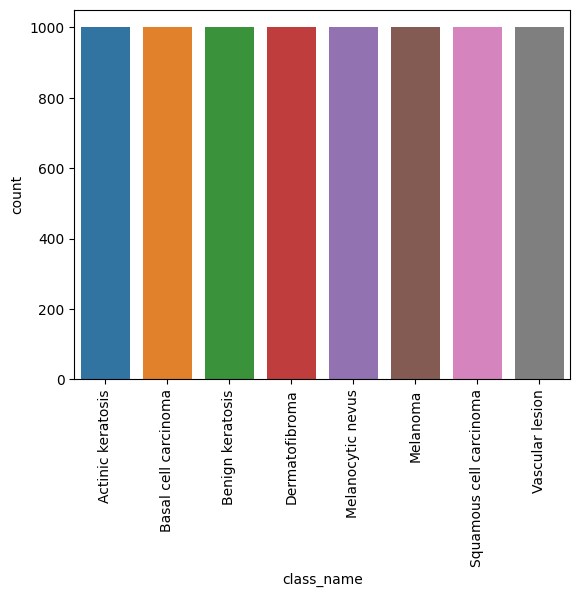

In [ ]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []

for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  total += count
print("Total Data Training Setelah Menggunakan Augmentor = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  print("Nama Class = ",class_names[i])
  print("Jumlah      = ",count)
  print("Proporsi = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])


temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(output_dir,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            seed=123,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 8000 files belonging to 8 classes.
Using 6400 files for training.


In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(output_dir,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            seed=123,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 8000 files belonging to 8 classes.
Using 1600 files for validation.


In [ ]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 40
Number of test batches: 10


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## Augmentasi Data Tambahan

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

## Membuat Model Dasar MobileNetV2

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
import numpy as np
normalized_ds = train_dataset.map(lambda x, y: (rescale(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

-0.9993566 0.8579352


In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(8, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 8)


In [ ]:
SHAPE_SIZE = (160, 160, 3) # cocokin sama IMG_SIZE

In [ ]:
inputs = tf.keras.Input(shape=SHAPE_SIZE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [ ]:
loss0, accuracy0 = model.evaluate(validation_dataset)

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 [==============================] - 11s 116ms/step - loss: 2.6742 - accuracy: 0.1273


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.67
initial accuracy: 0.13


## Melatih Pre Trained Model MobileNetV2

In [ ]:
initial_epochs = 100

history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/100
200/200 [==============================] - 27s 133ms/step - loss: 1.1342 - accuracy: 0.5833 - val_loss: 1.1012 - val_accuracy: 0.6062
Epoch 2/100
200/200 [==============================] - 31s 153ms/step - loss: 1.1140 - accuracy: 0.5889 - val_loss: 1.0793 - val_accuracy: 0.6070
Epoch 3/100
200/200 [==============================] - 26s 125ms/step - loss: 1.0869 - accuracy: 0.6095 - val_loss: 1.0777 - val_accuracy: 0.6133
Epoch 4/100
200/200 [==============================] - 28s 137ms/step - loss: 1.0623 - accuracy: 0.6152 - val_loss: 1.0541 - val_accuracy: 0.6133
Epoch 5/100
200/200 [==============================] - 24s 117ms/step - loss: 1.0435 - accuracy: 0.6252 - val_loss: 1.0294 - val_accuracy: 0.6250
Epoch 6/100
200/200 [==============================] - 25s 122ms/step - loss: 1.0165 - accuracy: 0.6334 - val_loss: 1.0261 - val_accuracy: 0.6250
Epoch 7/100
200/200 [==============================] - 20s 98ms/step - loss: 1.0146 - accuracy: 0.6372 - val_loss: 1.0075 - 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Menambahkan Fine Tuning Model

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
model.compile(loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
fine_tune_epochs = 50
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

In [ ]:
model.trainable = False

In [ ]:
model.save('Skin_Disease_2.h5')

Converting to a TF Lite Model

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
tflite_model_files = pathlib.Path("dermacare_tflite.tflite")
tflite_model_files.write_bytes(tflite_model)

# IMG_SIZE  = 80x80

## Import Library

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
import zipfile

# Extract the archive
local_zip = '/content/skin-disease-image-dataset-balanced.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_dir = pathlib.Path("/content/Split_smol/train")
validation_dir = pathlib.Path("/content/Split_smol/val")

BATCH_SIZE = 32
IMG_SIZE = (80, 80)

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            # validation_split=0.2,
                                                            # subset="training",
                                                            seed=123,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 1849 files belonging to 8 classes.


In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                            # validation_split=0.2,
                                                            # subset="validation",
                                                            seed=123,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 459 files belonging to 8 classes.


## Preview Dataset

In [ ]:
class_names = train_dataset.class_names

# plt.figure(figsize=(10, 10))
# for images, labels in train_dataset.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

## Identifikasi Keseimbangan Data

Total Data Training = 1849 

-------------------------------------
Nama Class  =  Actinic keratosis
Jumlah      =  224
Proporsi    =  0.12114656571119524
-------------------------------------
Nama Class  =  Basal cell carcinoma
Jumlah      =  240
Proporsi    =  0.12979989183342347
-------------------------------------
Nama Class  =  Benign keratosis
Jumlah      =  277
Proporsi    =  0.14981070849107625
-------------------------------------
Nama Class  =  Dermatofibroma
Jumlah      =  191
Proporsi    =  0.1032990805840995
-------------------------------------
Nama Class  =  Melanocytic nevus
Jumlah      =  219
Proporsi    =  0.11844240129799892
-------------------------------------
Nama Class  =  Melanoma
Jumlah      =  233
Proporsi    =  0.12601406165494863
-------------------------------------
Nama Class  =  Squamous cell carcinoma
Jumlah      =  263
Proporsi    =  0.14223904813412655
-------------------------------------
Nama Class  =  Vascular lesion
Jumlah      =  202
Proporsi    =

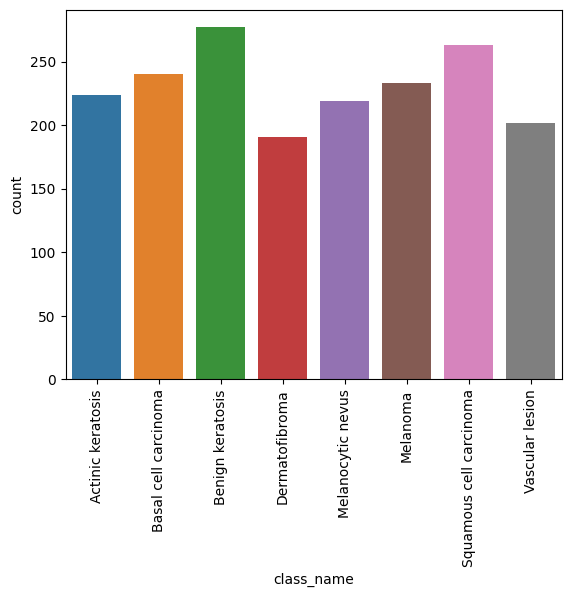

In [ ]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []
for i in range(num_classes):
  count = len(list(train_dir.glob(class_names[i]+'/*.jpg')))
  total += count
print("Total Data Training = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(train_dir.glob(class_names[i]+'/*.jpg')))
  print("Nama Class  = ",class_names[i])
  print("Jumlah      = ",count)
  print("Proporsi    = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

## Augmentor Untuk Augmentasi Data dan Menambah Sebaran Data Tiap Class

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(source_directory = os.path.join(train_dir, i), output_directory = '/content/output/'+i+'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)

Initialised with 224 image(s) found.
Output directory set to /content/output/Actinic keratosis/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7F89D05AD330>: 100%|██████████| 1000/1000 [01:39<00:00, 10.08 Samples/s]


Initialised with 240 image(s) found.
Output directory set to /content/output/Basal cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8A44282BC0>: 100%|██████████| 1000/1000 [00:41<00:00, 24.39 Samples/s]


Initialised with 277 image(s) found.
Output directory set to /content/output/Benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F89D02C32B0>: 100%|██████████| 1000/1000 [01:03<00:00, 15.64 Samples/s]


Initialised with 191 image(s) found.
Output directory set to /content/output/Dermatofibroma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F89D0601BA0>: 100%|██████████| 1000/1000 [01:22<00:00, 12.14 Samples/s]


Initialised with 219 image(s) found.
Output directory set to /content/output/Melanocytic nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=722x542 at 0x7F89C7631270>: 100%|██████████| 1000/1000 [01:20<00:00, 12.41 Samples/s]


Initialised with 233 image(s) found.
Output directory set to /content/output/Melanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F89C6F893C0>: 100%|██████████| 1000/1000 [01:27<00:00, 11.39 Samples/s]


Initialised with 263 image(s) found.
Output directory set to /content/output/Squamous cell carcinoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7F89C6E7E950>: 100%|██████████| 1000/1000 [01:13<00:00, 13.52 Samples/s]


Initialised with 202 image(s) found.
Output directory set to /content/output/Vascular lesion/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F89C7633A60>: 100%|██████████| 1000/1000 [01:12<00:00, 13.79 Samples/s]


In [ ]:
output_dir = pathlib.Path('/content/output')
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

24110


Total Data Training Setelah Menggunakan Augmentor = 24110 

-------------------------------------
Nama Class =  Actinic keratosis
Jumlah      =  3110
Proporsi =  0.12899211945250932
-------------------------------------
Nama Class =  Basal cell carcinoma
Jumlah      =  3000
Proporsi =  0.1244296972210701
-------------------------------------
Nama Class =  Benign keratosis
Jumlah      =  3000
Proporsi =  0.1244296972210701
-------------------------------------
Nama Class =  Dermatofibroma
Jumlah      =  3000
Proporsi =  0.1244296972210701
-------------------------------------
Nama Class =  Melanocytic nevus
Jumlah      =  3000
Proporsi =  0.1244296972210701
-------------------------------------
Nama Class =  Melanoma
Jumlah      =  3000
Proporsi =  0.1244296972210701
-------------------------------------
Nama Class =  Squamous cell carcinoma
Jumlah      =  3000
Proporsi =  0.1244296972210701
-------------------------------------
Nama Class =  Vascular lesion
Jumlah      =  3000
Proporsi

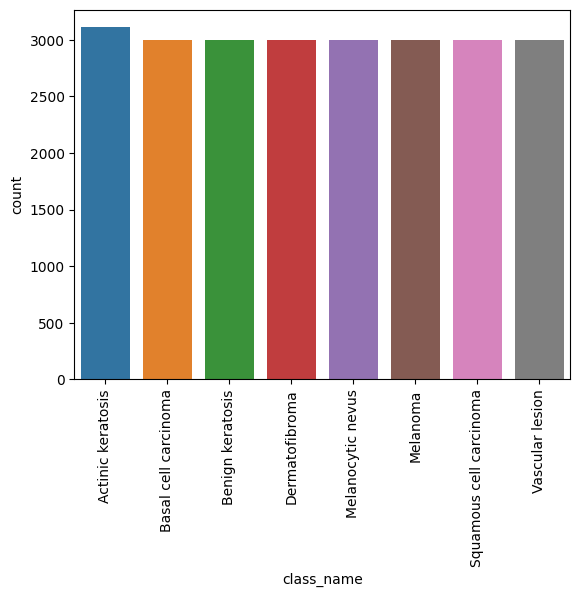

In [ ]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []

for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  total += count
print("Total Data Training Setelah Menggunakan Augmentor = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  print("Nama Class = ",class_names[i])
  print("Jumlah      = ",count)
  print("Proporsi = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])


temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(output_dir,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            seed=123,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 24110 files belonging to 8 classes.
Using 19288 files for training.


In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(output_dir,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            seed=123,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 24110 files belonging to 8 classes.
Using 4822 files for validation.


In [ ]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 121
Number of test batches: 30


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## Augmentasi Data Tambahan

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

## Membuat Model Dasar MobileNetV2

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
import numpy as np
normalized_ds = train_dataset.map(lambda x, y: (rescale(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

-0.8615737 0.7710593


In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 3, 3, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 40, 40, 32)   864         ['input_7[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 40, 40, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 40, 40, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(8, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 8)


In [ ]:
shape_input = (80, 80, 3) # cocokin sama IMG_SIZE

In [ ]:
inputs = tf.keras.Input(shape=shape_input)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 sequential_2 (Sequential)   (None, 80, 80, 3)         0         
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 80, 80, 3)        0         
 da)                                                             
                                                                 
 tf.math.subtract_3 (TFOpLam  (None, 80, 80, 3)        0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 3, 3, 1280)       2257984   
 ional)                                                          
                                                           

In [ ]:
loss0, accuracy0 = model.evaluate(validation_dataset)

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


121/121 [==============================] - 22s 122ms/step - loss: 3.4434 - accuracy: 0.0862


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 3.44
initial accuracy: 0.09


## Melatih Pre Trained Model MobileNetV2

In [ ]:
initial_epochs = 100

history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/100
603/603 [==============================] - 53s 80ms/step - loss: 2.2633 - accuracy: 0.2511 - val_loss: 1.6054 - val_accuracy: 0.3925
Epoch 2/100
603/603 [==============================] - 50s 82ms/step - loss: 1.7633 - accuracy: 0.3805 - val_loss: 1.4322 - val_accuracy: 0.4780
Epoch 3/100
603/603 [==============================] - 49s 80ms/step - loss: 1.6039 - accuracy: 0.4312 - val_loss: 1.3404 - val_accuracy: 0.5023
Epoch 4/100
603/603 [==============================] - 48s 79ms/step - loss: 1.4928 - accuracy: 0.4640 - val_loss: 1.2455 - val_accuracy: 0.5476
Epoch 5/100
603/603 [==============================] - 48s 80ms/step - loss: 1.4250 - accuracy: 0.4882 - val_loss: 1.2141 - val_accuracy: 0.5590
Epoch 6/100
603/603 [==============================] - 49s 81ms/step - loss: 1.3695 - accuracy: 0.5032 - val_loss: 1.1906 - val_accuracy: 0.5647
Epoch 7/100
603/603 [==============================] - 48s 78ms/step - loss: 1.3178 - accuracy: 0.5221 - val_loss: 1.1542 - val_ac

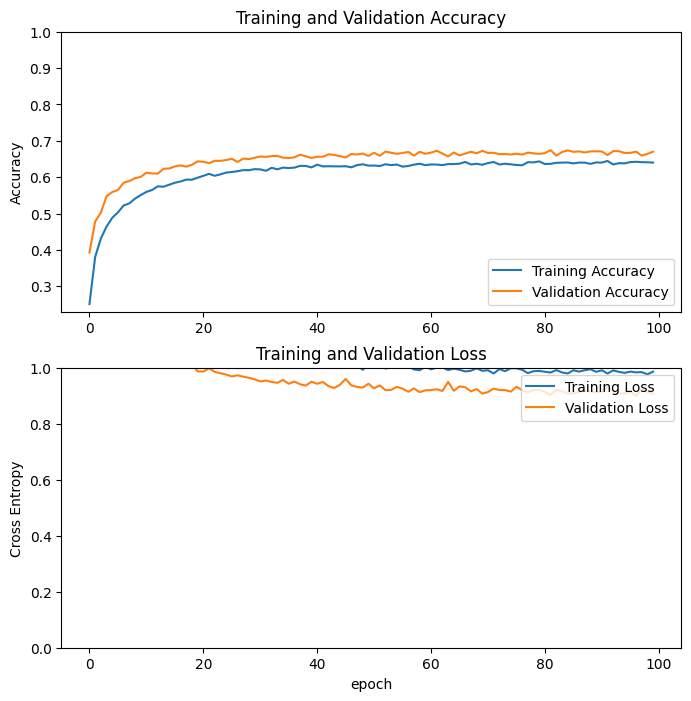

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Menambahkan Fine Tuning Model

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [ ]:
model.compile(loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 sequential_2 (Sequential)   (None, 80, 80, 3)         0         
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 80, 80, 3)        0         
 da)                                                             
                                                                 
 tf.math.subtract_3 (TFOpLam  (None, 80, 80, 3)        0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 3, 3, 1280)       2257984   
 ional)                                                          
                                                           

In [ ]:
fine_tune_epochs = 50
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 100/150
603/603 [==============================] - 62s 87ms/step - loss: 0.8950 - accuracy: 0.6758 - val_loss: 0.8313 - val_accuracy: 0.6942
Epoch 101/150
603/603 [==============================] - 54s 88ms/step - loss: 0.7646 - accuracy: 0.7206 - val_loss: 0.6910 - val_accuracy: 0.7416
Epoch 102/150
603/603 [==============================] - 52s 86ms/step - loss: 0.6816 - accuracy: 0.7459 - val_loss: 0.6362 - val_accuracy: 0.7600
Epoch 103/150
603/603 [==============================] - 52s 85ms/step - loss: 0.5966 - accuracy: 0.7794 - val_loss: 0.5902 - val_accuracy: 0.7807
Epoch 104/150
603/603 [==============================] - 52s 86ms/step - loss: 0.5399 - accuracy: 0.8032 - val_loss: 0.5508 - val_accuracy: 0.8014
Epoch 105/150
603/603 [==============================] - 53s 88ms/step - loss: 0.4884 - accuracy: 0.8219 - val_loss: 0.4620 - val_accuracy: 0.8247
Epoch 106/150
603/603 [==============================] - 51s 84ms/step - loss: 0.4503 - accuracy: 0.8362 - val_loss: 0

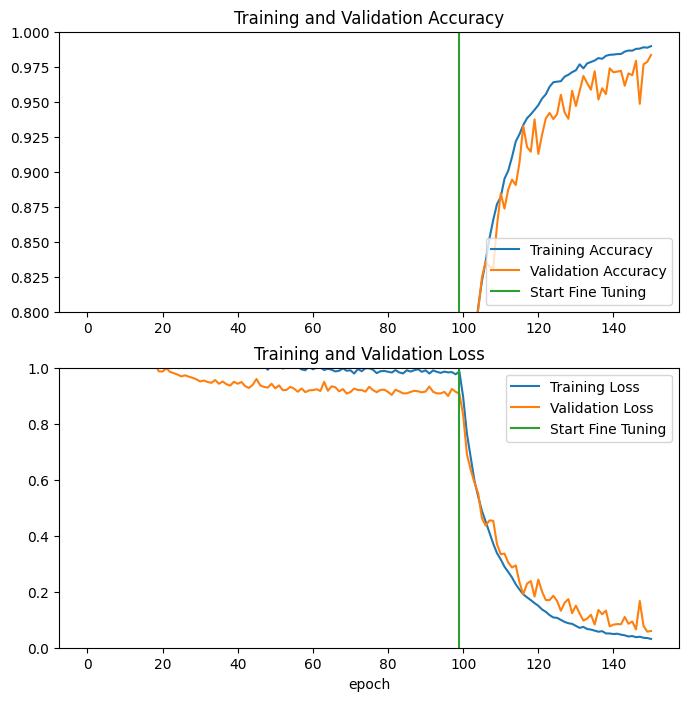

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

30/30 [==============================] - 2s 59ms/step - loss: 0.0400 - accuracy: 0.9875
Test accuracy : 0.987500011920929


In [ ]:
model.save('Skin_Disease_2.h5')

# Test the model

## Newly created model that has just created before ^^^



In [ ]:
TARGET_SIZE = (160, 160)
DISEASE_DICT = {
    0: "Actinic Keratosis",
    1: "Basal Cell Carcinoma",
    2: "Benign keratosis",
    3: "Dermatofibroma",
    4: "Melanocytic Nevus",
    5: "Melanoma",
    6: "Squamous Cell Carcinoma",
    7: "Vascular Lesion",
}

In [ ]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = tf.keras.utils.load_img(path, target_size=TARGET_SIZE)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  prediction = np.argmax(classes)
  print("The disease was: " + DISEASE_DICT.get(prediction))

Saving melanoma.jpeg to melanoma.jpeg
1/1 [==============================] - 1s 1s/step
[[2.0973764e-10 1.1495307e-04 9.9987042e-01 3.0596958e-10 5.6506706e-06
  2.5510456e-06 4.0182402e-12 6.4616565e-06]]
Please input correct image!.


## Import model

In [ ]:
TARGET_SIZE = (160, 160)

In [ ]:
DISEASE_DICT = {
    0: "Actinic Keratosis",
    1: "Basal Cell Carcinoma",
    2: "Benign keratosis",
    3: "Dermatofibroma",
    4: "Melanocytic Nevus",
    5: "Melanoma",
    6: "Squamous Cell Carcinoma",
    7: "Vascular Lesion",
}

In [ ]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files

model_path = '/content/dermacare.h5'
model = keras.models.load_model(model_path)

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = tf.keras.utils.load_img(path, target_size=TARGET_SIZE)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  prediction = np.argmax(classes)
  print("The disease was: " + DISEASE_DICT.get(prediction))


Saving ISIC_0024515.jpg to ISIC_0024515.jpg
1/1 [==============================] - 8s 8s/step
The disease was: Basal Cell Carcinoma


# Converting an available tf model to tflite model

In [ ]:
model_path = '/content/dermacare.h5'
model = keras.models.load_model(model_path)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
tflite_model_files = pathlib.Path("/content/dermacare_tflite.tflite")
tflite_model_files.write_bytes(tflite_model)

8906316